# The Sound of Shazam

Sonified audio fingerprints.

(simplified version)

We'll be using iPython for playback and Librosa for audio analysis:

In [2]:
%pylab inline
import IPython
import librosa as lr

Populating the interactive namespace from numpy and matplotlib


## Step 1: load some sample audio and get the spectogram

In [3]:
# read audio
y, sr = lr.load('rick.wav', sr=44100, mono=True)

In [4]:
# stft
n = 4096
hop = n/2
Y = lr.stft(y, n_fft=n, hop_length=hop)

In [5]:
# crop the spectrogram
fmax = 8000.0
maxbin = int(fmax/sr*n)
Yc = Y[:maxbin,:]

# magnitudes
Ym = np.abs(Yc)

# normalize
Yn = Ym/np.max(Ym)

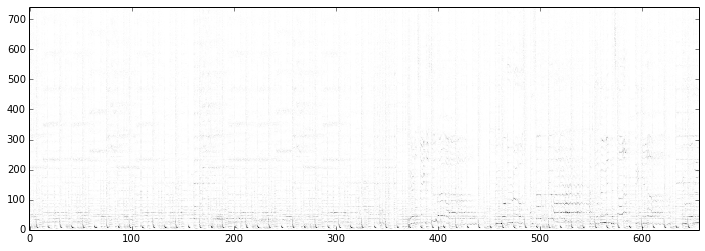

In [6]:
# plot sample
fig, ax = subplots(figsize=(12, 4))
ax.imshow(Yn, origin='lower', interpolation='nearest', aspect='auto', cmap='binary')

## Step 2: peak detection

In [7]:
from scipy.ndimage.morphology import grey_dilation

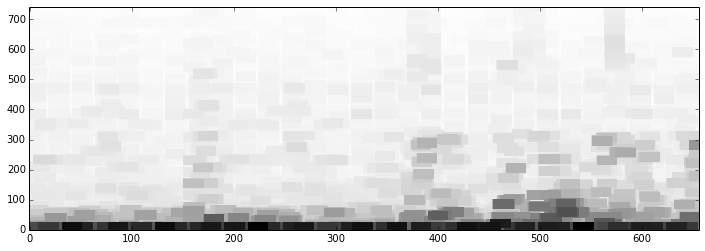

In [8]:
# mask size
mask_size = (32,20)

# compute mask
mask = grey_dilation(Yn, size=mask_size)

# plot mask
fig, ax = subplots(figsize=(12, 4))
ax.imshow(mask, origin='lower', interpolation='nearest', aspect='auto', cmap='binary')

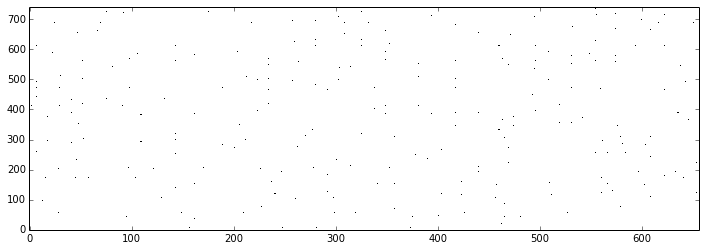

In [9]:
# peak detection trick: peak locations <=> image == mask
peaks = Yn*(Yn==mask)

# plot peaks
fig, ax = subplots(figsize=(12, 4))
ax.imshow(Yn==mask, origin='lower', interpolation='nearest', aspect='auto', cmap='binary')

## Step 3: reconstruct peak-only signal using the inverse STFT

In [10]:
Z = np.zeros(Y.shape, complex)
Z[:peaks.shape[0],:] = peaks

In [11]:
# istft the result...
z = lr.istft(Z, hop_length=hop)

In [12]:
# let's listen!
IPython.display.Audio(data=z, rate=sr)